# Project 1: -  Prediction of taxi fare

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings('ignore')

In [2]:
tx = pd.read_csv("https://raw.githubusercontent.com/SANTHOSH2945/Taxi-Fare-prediction/main/taxi_fare.csv")

In [3]:
tx

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
0,26:21.0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,52:16.0,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,35:00.0,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,30:42.0,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,51:00.0,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1
...,...,...,...,...,...,...,...,...
49995,25:15.0,15.0,2013-06-12 23:25:15 UTC,-73.999973,40.748531,-74.016899,40.705993,1
49996,19:18.0,7.5,2015-06-22 17:19:18 UTC,-73.984756,40.768211,-73.987366,40.760597,1
49997,53:00.0,6.9,2011-01-30 04:53:00 UTC,-74.002698,40.739428,-73.998108,40.759483,1
49998,09:00.0,4.5,2012-11-06 07:09:00 UTC,-73.946062,40.777567,-73.953450,40.779687,2


In [4]:
tx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   unique_id             50000 non-null  object 
 1   amount                50000 non-null  float64
 2   date_time_of_pickup   50000 non-null  object 
 3   longitude_of_pickup   50000 non-null  float64
 4   latitude_of_pickup    50000 non-null  float64
 5   longitude_of_dropoff  50000 non-null  float64
 6   latitude_of_dropoff   50000 non-null  float64
 7   no_of_passenger       50000 non-null  int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 3.1+ MB


In [5]:
tx.shape

(50000, 8)

In [6]:
tx.columns

Index(['unique_id', 'amount', 'date_time_of_pickup', 'longitude_of_pickup',
       'latitude_of_pickup', 'longitude_of_dropoff', 'latitude_of_dropoff',
       'no_of_passenger'],
      dtype='object')

In [7]:
tx.describe

<bound method NDFrame.describe of       unique_id  amount      date_time_of_pickup  longitude_of_pickup  \
0       26:21.0     4.5  2009-06-15 17:26:21 UTC           -73.844311   
1       52:16.0    16.9  2010-01-05 16:52:16 UTC           -74.016048   
2       35:00.0     5.7  2011-08-18 00:35:00 UTC           -73.982738   
3       30:42.0     7.7  2012-04-21 04:30:42 UTC           -73.987130   
4       51:00.0     5.3  2010-03-09 07:51:00 UTC           -73.968095   
...         ...     ...                      ...                  ...   
49995   25:15.0    15.0  2013-06-12 23:25:15 UTC           -73.999973   
49996   19:18.0     7.5  2015-06-22 17:19:18 UTC           -73.984756   
49997   53:00.0     6.9  2011-01-30 04:53:00 UTC           -74.002698   
49998   09:00.0     4.5  2012-11-06 07:09:00 UTC           -73.946062   
49999   13:14.0    10.9  2010-01-13 08:13:14 UTC           -73.932603   

       latitude_of_pickup  longitude_of_dropoff  latitude_of_dropoff  \
0               4

In [8]:
tx.sample(10) # 10 rows of data from dataset

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
22235,18:39.0,5.70,2010-05-22 11:18:39 UTC,-73.979732,40.749506,-73.990044,40.738048,1
5923,59:00.0,5.00,2012-12-25 18:59:00 UTC,-73.975660,40.757580,-73.969922,40.763327,3
46583,15:00.0,5.30,2011-11-05 02:15:00 UTC,-73.980463,40.730373,-73.994125,40.732458,2
26403,49:00.0,7.30,2011-05-27 16:49:00 UTC,-73.950368,40.779895,-73.937025,40.801947,1
41743,56:09.0,32.33,2014-08-09 08:56:09 UTC,-73.870914,40.773748,-73.988878,40.731205,1
44994,45:40.0,11.50,2013-07-10 12:45:40 UTC,-74.005372,40.737025,-73.986788,40.736540,1
20799,26:00.0,8.90,2009-03-06 19:26:00 UTC,-73.989808,40.752472,-73.984517,40.768998,2
6281,46:04.0,6.50,2010-02-11 23:46:04 UTC,-73.984391,40.759767,-73.982305,40.743090,3
12703,53:04.0,7.70,2010-05-22 12:53:04 UTC,-73.976072,40.748160,-73.993919,40.740357,1
17493,49:11.0,9.50,2014-06-19 22:49:11 UTC,-73.973473,40.755473,-73.949361,40.781956,1


In [9]:
# Dropping / Ignoring unique_id 
tx = tx.drop("unique_id",axis=1)
tx

,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1
...,...,...,...,...,...,...,...
49995,15.0,2013-06-12 23:25:15 UTC,-73.999973,40.748531,-74.016899,40.705993,1
49996,7.5,2015-06-22 17:19:18 UTC,-73.984756,40.768211,-73.987366,40.760597,1
49997,6.9,2011-01-30 04:53:00 UTC,-74.002698,40.739428,-73.998108,40.759483,1
49998,4.5,2012-11-06 07:09:00 UTC,-73.946062,40.777567,-73.953450,40.779687,2


In [10]:
tx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   amount                50000 non-null  float64
 1   date_time_of_pickup   50000 non-null  object 
 2   longitude_of_pickup   50000 non-null  float64
 3   latitude_of_pickup    50000 non-null  float64
 4   longitude_of_dropoff  50000 non-null  float64
 5   latitude_of_dropoff   50000 non-null  float64
 6   no_of_passenger       50000 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 2.7+ MB


In [11]:
# Converting date_time_of_pickup from object type to date_time setup
tx["date_time_of_pickup"] = pd.to_datetime(tx["date_time_of_pickup"])

In [12]:
tx

,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
0,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1
1,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1
2,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2
3,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1
4,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1
...,...,...,...,...,...,...,...
49995,15.0,2013-06-12 23:25:15+00:00,-73.999973,40.748531,-74.016899,40.705993,1
49996,7.5,2015-06-22 17:19:18+00:00,-73.984756,40.768211,-73.987366,40.760597,1
49997,6.9,2011-01-30 04:53:00+00:00,-74.002698,40.739428,-73.998108,40.759483,1
49998,4.5,2012-11-06 07:09:00+00:00,-73.946062,40.777567,-73.953450,40.779687,2


In [13]:
tx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype              
---  ------                --------------  -----              
 0   amount                50000 non-null  float64            
 1   date_time_of_pickup   50000 non-null  datetime64[ns, UTC]
 2   longitude_of_pickup   50000 non-null  float64            
 3   latitude_of_pickup    50000 non-null  float64            
 4   longitude_of_dropoff  50000 non-null  float64            
 5   latitude_of_dropoff   50000 non-null  float64            
 6   no_of_passenger       50000 non-null  int64              
dtypes: datetime64[ns, UTC](1), float64(5), int64(1)
memory usage: 2.7 MB


In [14]:
# Calculation of Distance
#Converting the latitude and longitude values from decimal degrees to radians
from math import radians, cos,sin, asin,sqrt
def distance(lon1, lon2, lat1 , lat2):
    
    
    lon1 =radians(lon1)
    lon2 =radians(lon2)
    lat1 =radians(lat1)
    lat2 =radians(lat2)
    
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a))
    
    r = 6371 # Radius value
    return(round (c * r, 2))
dst = []
for i in range(tx.shape[0]):
    dst.append(distance(tx["latitude_of_pickup"][i],
                      tx["latitude_of_dropoff"][i],
                      tx["longitude_of_pickup"][i],
                      tx["longitude_of_dropoff"][i]))

In [15]:
tx["Distance (km)"] = dst

In [16]:
tx

,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,Distance (km)
0,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1,0.41
1,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1,4.63
2,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2,1.00
3,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1,0.91
4,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1,1.36
...,...,...,...,...,...,...,...,...
49995,15.0,2013-06-12 23:25:15+00:00,-73.999973,40.748531,-74.016899,40.705993,1,2.29
49996,7.5,2015-06-22 17:19:18+00:00,-73.984756,40.768211,-73.987366,40.760597,1,0.37
49997,6.9,2011-01-30 04:53:00+00:00,-74.002698,40.739428,-73.998108,40.759483,1,0.80
49998,4.5,2012-11-06 07:09:00+00:00,-73.946062,40.777567,-73.953450,40.779687,2,0.82


In [17]:
# Now dropping the details of longitude and latitude
tx = tx.drop(["longitude_of_pickup","latitude_of_pickup","longitude_of_dropoff","latitude_of_dropoff"],axis=1)


In [18]:
tx

,amount,date_time_of_pickup,no_of_passenger,Distance (km)
0,4.5,2009-06-15 17:26:21+00:00,1,0.41
1,16.9,2010-01-05 16:52:16+00:00,1,4.63
2,5.7,2011-08-18 00:35:00+00:00,2,1.00
3,7.7,2012-04-21 04:30:42+00:00,1,0.91
4,5.3,2010-03-09 07:51:00+00:00,1,1.36
...,...,...,...,...
49995,15.0,2013-06-12 23:25:15+00:00,1,2.29
49996,7.5,2015-06-22 17:19:18+00:00,1,0.37
49997,6.9,2011-01-30 04:53:00+00:00,1,0.80
49998,4.5,2012-11-06 07:09:00+00:00,2,0.82


In [19]:
# Looking into Number of passenger
tx["no_of_passenger"].value_counts()

1    34808
2     7386
5     3453
3     2183
4     1016
6      989
0      165
Name: no_of_passenger, dtype: int64

In [20]:
# Neglecting the 0 passenger Rows by assigning null values to them and dropping them
tx['no_of_passenger'] = tx['no_of_passenger'].replace(0, np.nan)

In [21]:
tx.isnull().sum()

amount                   0
date_time_of_pickup      0
no_of_passenger        165
Distance (km)            0
dtype: int64

In [22]:
tx = tx.dropna()

In [23]:
tx.isnull().sum()

amount                 0
date_time_of_pickup    0
no_of_passenger        0
Distance (km)          0
dtype: int64

In [24]:


print("Date in taxi data : ", tx["date_time_of_pickup"].dt.day.sort_values().unique())
print("Month in taxi data : ", tx["date_time_of_pickup"].dt.month.unique()[0])
print("Year in taxi data : ", tx["date_time_of_pickup"].dt.year.unique()[0])



Date in taxi data :  [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31]
Month in taxi data :  6
Year in taxi data :  2009


In [25]:
tx["weekday"] = tx["date_time_of_pickup"].dt.weekday

In [26]:
tx

,amount,date_time_of_pickup,no_of_passenger,Distance (km),weekday
0,4.5,2009-06-15 17:26:21+00:00,1.0,0.41,0
1,16.9,2010-01-05 16:52:16+00:00,1.0,4.63,1
2,5.7,2011-08-18 00:35:00+00:00,2.0,1.00,3
3,7.7,2012-04-21 04:30:42+00:00,1.0,0.91,5
4,5.3,2010-03-09 07:51:00+00:00,1.0,1.36,1
...,...,...,...,...,...
49995,15.0,2013-06-12 23:25:15+00:00,1.0,2.29,2
49996,7.5,2015-06-22 17:19:18+00:00,1.0,0.37,0
49997,6.9,2011-01-30 04:53:00+00:00,1.0,0.80,6
49998,4.5,2012-11-06 07:09:00+00:00,2.0,0.82,1


In [27]:
tx["weekday"] = tx["weekday"].replace({0: "Sunday", 1: "Monday", 2: "Tuesday", 3: "Wednesday", 4: "Thursday", 5: "Friday", 6: "Saturday"})

In [28]:
tx

,amount,date_time_of_pickup,no_of_passenger,Distance (km),weekday
0,4.5,2009-06-15 17:26:21+00:00,1.0,0.41,Sunday
1,16.9,2010-01-05 16:52:16+00:00,1.0,4.63,Monday
2,5.7,2011-08-18 00:35:00+00:00,2.0,1.00,Wednesday
3,7.7,2012-04-21 04:30:42+00:00,1.0,0.91,Friday
4,5.3,2010-03-09 07:51:00+00:00,1.0,1.36,Monday
...,...,...,...,...,...
49995,15.0,2013-06-12 23:25:15+00:00,1.0,2.29,Tuesday
49996,7.5,2015-06-22 17:19:18+00:00,1.0,0.37,Sunday
49997,6.9,2011-01-30 04:53:00+00:00,1.0,0.80,Saturday
49998,4.5,2012-11-06 07:09:00+00:00,2.0,0.82,Monday


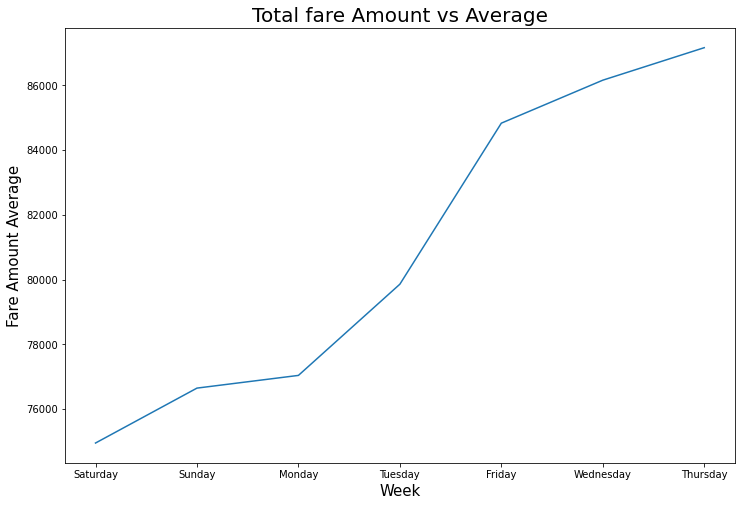

In [29]:
# Plotting the graph
plt.figure(figsize = (12,8))
tx.groupby("weekday")["amount"].sum().sort_values().plot()

plt.xlabel("Week", fontsize=15)
plt.ylabel("Fare Amount Average", fontsize=15)
plt.title("Total fare Amount vs Average", fontsize=20)
plt.show()

In [30]:
tx["weekday"] = tx["weekday"].replace({"Sunday": 1, "Saturday": 2, "Monday": 3, "Tuesday": 4, "Friday": 5, "Wednesday": 6, "Thursday": 7})

In [31]:
tx

,amount,date_time_of_pickup,no_of_passenger,Distance (km),weekday
0,4.5,2009-06-15 17:26:21+00:00,1.0,0.41,1
1,16.9,2010-01-05 16:52:16+00:00,1.0,4.63,3
2,5.7,2011-08-18 00:35:00+00:00,2.0,1.00,6
3,7.7,2012-04-21 04:30:42+00:00,1.0,0.91,5
4,5.3,2010-03-09 07:51:00+00:00,1.0,1.36,3
...,...,...,...,...,...
49995,15.0,2013-06-12 23:25:15+00:00,1.0,2.29,4
49996,7.5,2015-06-22 17:19:18+00:00,1.0,0.37,1
49997,6.9,2011-01-30 04:53:00+00:00,1.0,0.80,2
49998,4.5,2012-11-06 07:09:00+00:00,2.0,0.82,3


In [32]:
tx["Hour"] = tx["date_time_of_pickup"].dt.hour

In [33]:
tx

,amount,date_time_of_pickup,no_of_passenger,Distance (km),weekday,Hour
0,4.5,2009-06-15 17:26:21+00:00,1.0,0.41,1,17
1,16.9,2010-01-05 16:52:16+00:00,1.0,4.63,3,16
2,5.7,2011-08-18 00:35:00+00:00,2.0,1.00,6,0
3,7.7,2012-04-21 04:30:42+00:00,1.0,0.91,5,4
4,5.3,2010-03-09 07:51:00+00:00,1.0,1.36,3,7
...,...,...,...,...,...,...
49995,15.0,2013-06-12 23:25:15+00:00,1.0,2.29,4,23
49996,7.5,2015-06-22 17:19:18+00:00,1.0,0.37,1,17
49997,6.9,2011-01-30 04:53:00+00:00,1.0,0.80,2,4
49998,4.5,2012-11-06 07:09:00+00:00,2.0,0.82,3,7


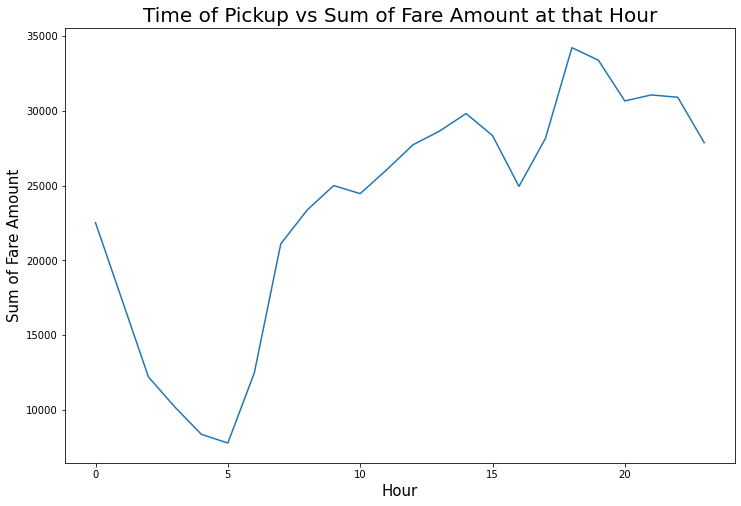

In [34]:
# Plotting graph of Fare vs Pickup time
plt.figure(figsize = (12,8))

tx.groupby("Hour")["amount"].sum().plot()
plt.title("Time of Pickup vs Sum of Fare Amount at that Hour", fontsize=20)
plt.xlabel("Hour", fontsize=15)
plt.ylabel("Sum of Fare Amount", fontsize=15)
plt.show()

In [35]:
tx["Month_Day"] = tx["date_time_of_pickup"].dt.day

In [36]:
tx["Month_Day"].unique()

array([15,  5, 18, 21,  9,  6, 20,  4,  3,  2,  8, 24, 23, 19, 22,  7, 12,
       10, 28, 11, 29, 31,  1, 14, 16, 17, 27, 25, 30, 26, 13],
      dtype=int64)

In [37]:
# Sum of Taxi Fare according to the particular day

for day in list(tx["date_time_of_pickup"].dt.day.sort_values().unique()):
    
    print(f"Date : {day} \t Total fare Amount : ${round(tx[tx.date_time_of_pickup.dt.day==day].amount.sum(), 2)}")

Date : 1 	 Total fare Amount : $17194.13
Date : 2 	 Total fare Amount : $17630.81
Date : 3 	 Total fare Amount : $17827.36
Date : 4 	 Total fare Amount : $16847.36
Date : 5 	 Total fare Amount : $18377.56
Date : 6 	 Total fare Amount : $18834.9
Date : 7 	 Total fare Amount : $19934.42
Date : 8 	 Total fare Amount : $19704.57
Date : 9 	 Total fare Amount : $19086.23
Date : 10 	 Total fare Amount : $19083.09
Date : 11 	 Total fare Amount : $18507.09
Date : 12 	 Total fare Amount : $20094.67
Date : 13 	 Total fare Amount : $19712.51
Date : 14 	 Total fare Amount : $18878.92
Date : 15 	 Total fare Amount : $19383.17
Date : 16 	 Total fare Amount : $19832.6
Date : 17 	 Total fare Amount : $19428.91
Date : 18 	 Total fare Amount : $19033.24
Date : 19 	 Total fare Amount : $19753.49
Date : 20 	 Total fare Amount : $18747.26
Date : 21 	 Total fare Amount : $20094.83
Date : 22 	 Total fare Amount : $18612.13
Date : 23 	 Total fare Amount : $18765.67
Date : 24 	 Total fare Amount : $18004.3
Date

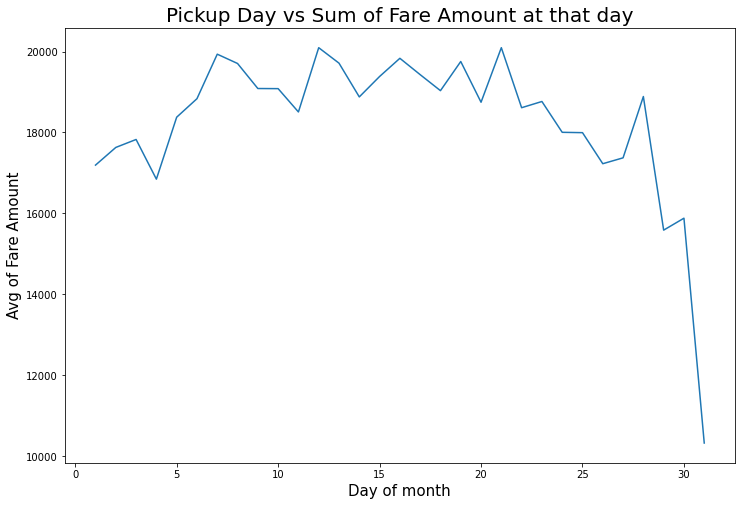

In [38]:
# plotting graph between Pickup Day and Sum of taxi fare on that day
plt.figure(figsize = (12, 8))

tx.groupby("Month_Day")["amount"].sum().plot()
plt.title("Pickup Day vs Sum of Fare Amount at that day", fontsize=20)
plt.xlabel("Day of month", fontsize=15)
plt.ylabel("Avg of Fare Amount", fontsize=15)
plt.show()

In [39]:
# Looking into Number of passenger
#tx["no_of_passenger"].value_counts()

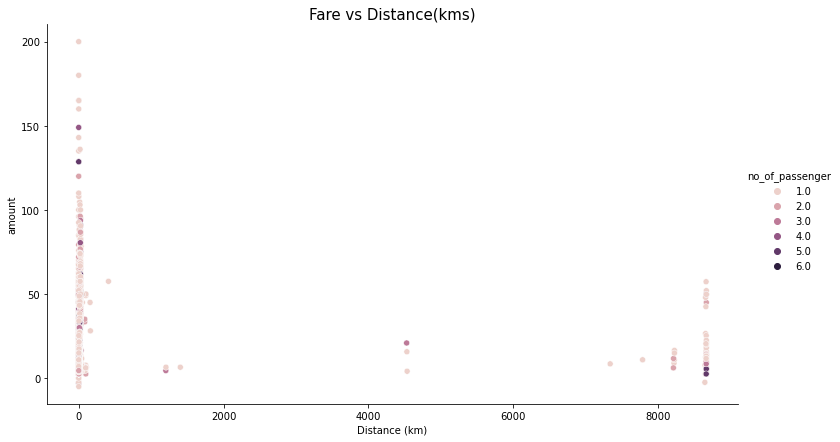

In [40]:
# Now drawing the graph between taxi fare vs Distance travelled

sns.relplot(data = tx, kind = "scatter",x = "Distance (km)",y = "amount",
            hue = "no_of_passenger",height=6 ,aspect = 1.75,)
plt.title("Fare vs Distance(kms)" , fontsize=15)
plt.show()

In [41]:
tx

,amount,date_time_of_pickup,no_of_passenger,Distance (km),weekday,Hour,Month_Day
0,4.5,2009-06-15 17:26:21+00:00,1.0,0.41,1,17,15
1,16.9,2010-01-05 16:52:16+00:00,1.0,4.63,3,16,5
2,5.7,2011-08-18 00:35:00+00:00,2.0,1.00,6,0,18
3,7.7,2012-04-21 04:30:42+00:00,1.0,0.91,5,4,21
4,5.3,2010-03-09 07:51:00+00:00,1.0,1.36,3,7,9
...,...,...,...,...,...,...,...
49995,15.0,2013-06-12 23:25:15+00:00,1.0,2.29,4,23,12
49996,7.5,2015-06-22 17:19:18+00:00,1.0,0.37,1,17,22
49997,6.9,2011-01-30 04:53:00+00:00,1.0,0.80,2,4,30
49998,4.5,2012-11-06 07:09:00+00:00,2.0,0.82,3,7,6


In [42]:
# Droppintg the date_time_of_pickup from taxi fare data
tx.drop("date_time_of_pickup", axis=1, inplace=True)

In [43]:
tx

,amount,no_of_passenger,Distance (km),weekday,Hour,Month_Day
0,4.5,1.0,0.41,1,17,15
1,16.9,1.0,4.63,3,16,5
2,5.7,2.0,1.00,6,0,18
3,7.7,1.0,0.91,5,4,21
4,5.3,1.0,1.36,3,7,9
...,...,...,...,...,...,...
49995,15.0,1.0,2.29,4,23,12
49996,7.5,1.0,0.37,1,17,22
49997,6.9,1.0,0.80,2,4,30
49998,4.5,2.0,0.82,3,7,6


In [44]:
# Training and Test data
# independent variable
x = tx.drop(['amount'], axis = 1)
# dependent varible
y = tx[['amount']]

In [45]:
# splitting x and y into traing and test set in 70:30 ratio
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.30,random_state = 1)

# Linear Regression

In [46]:
linearmodel = LinearRegression(fit_intercept= True, normalize =True)
linearmodel.fit(x_train,y_train)

LinearRegression(normalize=True)

In [47]:
linearmodel.score(x_train,y_train) # Score of the train data

0.001171666927421211

In [48]:
linearmodel.score(x_test,y_test) # score of the test data

0.0005657667087141105

In [49]:
# Linear Regression is not Good for This data

# Ploynomial Regression

In [50]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

In [51]:
poly = PolynomialFeatures(degree = 4,interaction_only = True)
x_train2 = poly.fit_transform(x_train)
x_test2 = poly.fit_transform(x_test)
poly_clf = linear_model.LinearRegression()
poly_clf.fit(x_train2,y_train)
print(poly_clf.score(x_train2,y_train))

0.002464145832801301


In [52]:
print(poly_clf.score(x_test2,y_test))

-0.0012611243685509699


In [53]:
#Ploynomial Regression is also Not good 

# Support Vector Machine

In [54]:
from sklearn.svm import SVR

In [55]:
svr_model = SVR(C=6,gamma=0.002)
svr_model.fit(x_train,y_train)

SVR(C=6, gamma=0.002)

In [56]:
svr_model.score(x_train,y_train)

0.6245887857918297

In [57]:
svr_model.score(x_test,y_test)

0.6598310732591729

In [58]:
# Support Vector Machine is fitting But the score is less

In [59]:
#Decision tree
from sklearn.tree import DecisionTreeRegressor

In [60]:
model_2 = DecisionTreeRegressor(max_depth = 8,min_samples_split=8,min_samples_leaf=3)

In [61]:
model_2.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=8, min_samples_leaf=3, min_samples_split=8)

In [62]:
model_2.score(x_train,y_train)

0.6939846769623677

In [63]:
model_2.score(x_test,y_test)

0.668509070563638

# Ensemble Bagging Regression

In [64]:
from sklearn.ensemble import BaggingRegressor
bgcl = BaggingRegressor( n_estimators = 150,base_estimator = model_2,random_state = 1)
bgcl = bgcl.fit(x_train,y_train)

In [65]:
bgcl.score(x_train,y_train)

0.7029032776113218

In [66]:
bgcl.score(x_test,y_test)

0.6873599711491025

# AdaBoostRegressor

In [67]:
from sklearn.ensemble import AdaBoostRegressor
abcl = AdaBoostRegressor( n_estimators = 50,random_state = 1)
abcl = abcl.fit(x_train,y_train)

In [68]:
abcl.score(x_train,y_train)

0.33814978977185806

In [69]:
abcl.score(x_test,y_test)

0.26135966812937084

# Gradient boosting

In [70]:
from sklearn.ensemble import GradientBoostingRegressor
gbcl = GradientBoostingRegressor( n_estimators = 50,random_state = 1)
gbcl = gbcl.fit(x_train,y_train)

In [71]:
gbcl.score(x_train,y_train)

0.671328380672461

In [72]:
gbcl.score(x_test,y_test)

0.6924123193771096

# Random Forest Regressor

In [73]:
from sklearn.ensemble import RandomForestRegressor
rfcl = RandomForestRegressor( n_estimators = 150,random_state = 1,min_samples_leaf=9)
rfcl = rfcl.fit(x_train,y_train)

In [74]:
rfcl.score(x_train,y_train)

0.7364393254977294

In [75]:
rfcl.score(x_test,y_test)

0.6840708115366809

# Conclusion